In [1]:
%matplotlib inline
from __future__ import division, print_function
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision = 4, linewidth = 100)
from matplotlib import pyplot as plt

In [2]:
import utils; reload(utils)
from utils import plots

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
Using Theano backend.


In [3]:
path = 'data/dogscats/'
batch_size = 128 # 128 is max batch size for this data and p2 instance

In [4]:
# import class and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [5]:
vgg = Vgg16()

In [6]:
batches = vgg.get_batches(path + 'train', batch_size = batch_size)

Found 23000 images belonging to 2 classes.


In [7]:
# batches is just a regular python iterator. each iteration returns both
# the images themselves, as well as labels
imgs,labels = next(batches)

In [8]:
labels

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,

In [9]:
imgs.shape

(128, 3, 224, 224)

In [10]:
val_batches = vgg.get_batches(path + 'valid', batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [11]:
vgg.finetune(batches)

In [12]:
vgg.fit(batches, val_batches, nb_epoch = 1)

Epoch 1/1
636s - loss: 0.1291 - acc: 0.9645 - val_loss: 0.0588 - val_acc: 0.9820


In [13]:
imgs, labels = next(val_batches)

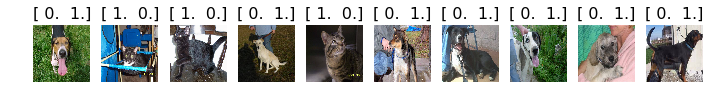

In [14]:
plots(imgs[0:10], titles = labels[0:10])

In [15]:
vgg.predict(imgs[0:10], True)

(array([ 1.    ,  0.9717,  0.784 ,  1.    ,  0.9999,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ], dtype=float32),
 array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1]),
 ['dogs',
  'cats',
  'cats',
  'dogs',
  'cats',
  'dogs',
  'dogs',
  'dogs',
  'dogs',
  'dogs'])

In [16]:
vgg.classes

['cats', 'dogs']

In [17]:
??vgg.predict

In [ ]:
# batch size 64:
#   629s - loss: 0.1240 - acc: 0.9681 - val_loss: 0.0633 - val_acc: 0.9835
# batch size 128:
#   636s - loss: 0.1291 - acc: 0.9645 - val_loss: 0.0588 - val_acc: 0.9820